In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# 5000 mouvements

## Path simulation 1
Chemin au dossier de la simulation

In [2]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/5000mouvements/1"

## Temps d'exécutions (ms)

In [3]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0     6  391894        0      0  391902


## Modèle SIR

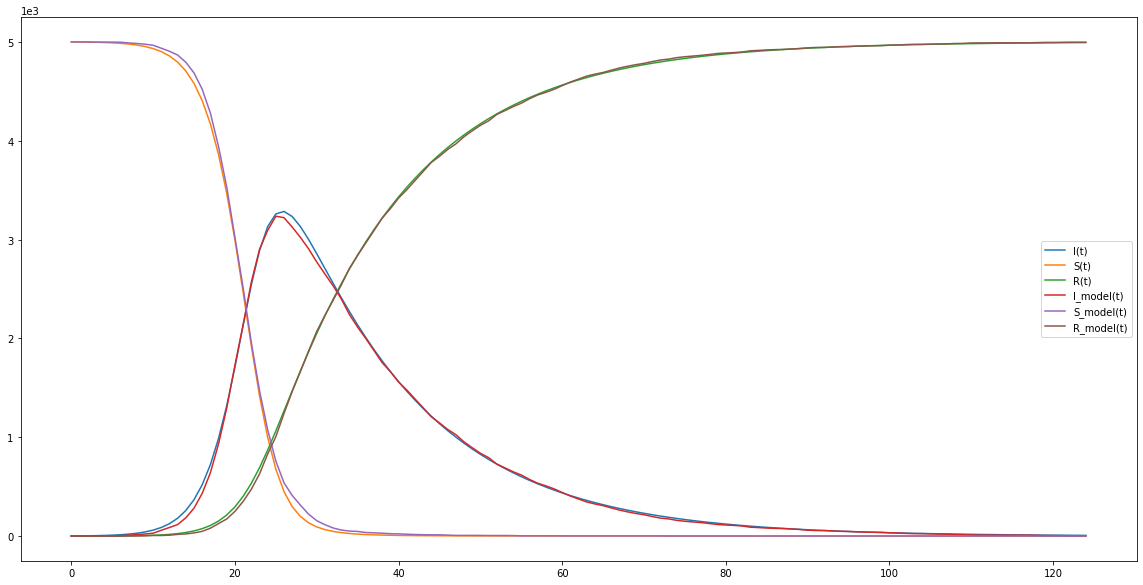

In [4]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.515
gamma = 0.062
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [5]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/5000mouvements/2"

## Temps d'exécutions (ms)

In [6]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    17  1136060        1      1  1136081


## Modèle SIR

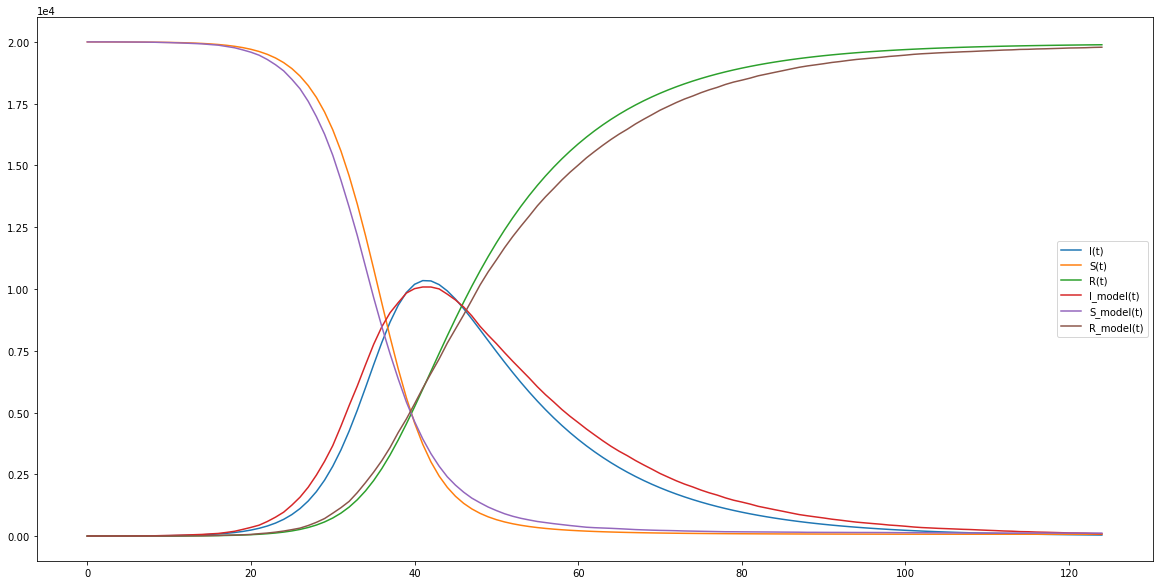

In [7]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.37
gamma = 0.07
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [8]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/5000mouvements/3"

## Temps d'exécutions (ms)

In [9]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    29  2418556        7      2  2418595


## Modèle SIR

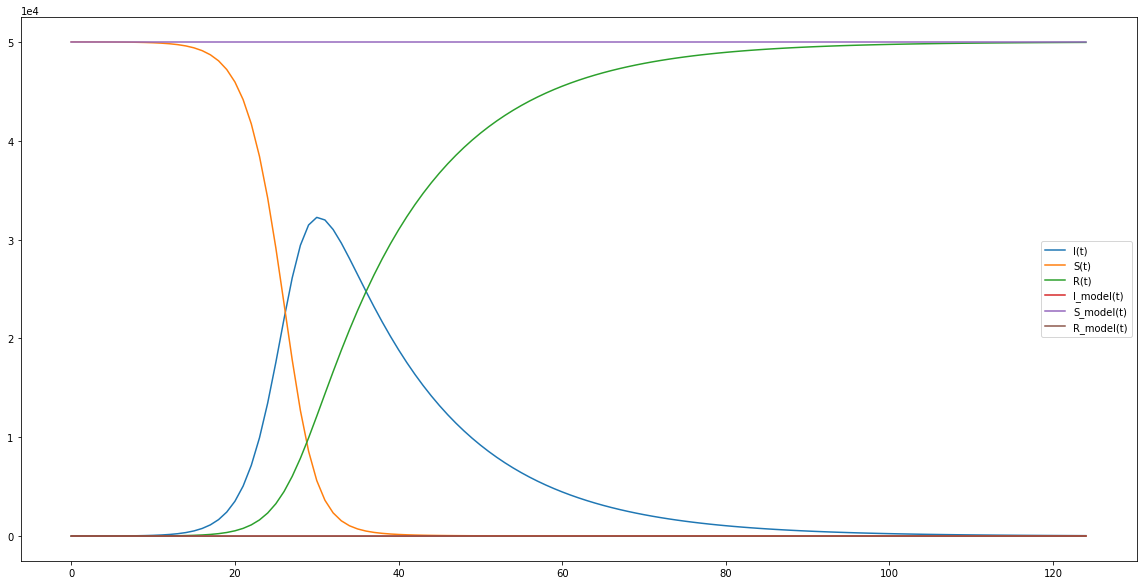

In [10]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.55
gamma = 0.07
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [11]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/5000mouvements/4"

## Temps d'exécutions (ms)

In [12]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0    53  5799648        5     10  5799718


## Modèle SIR

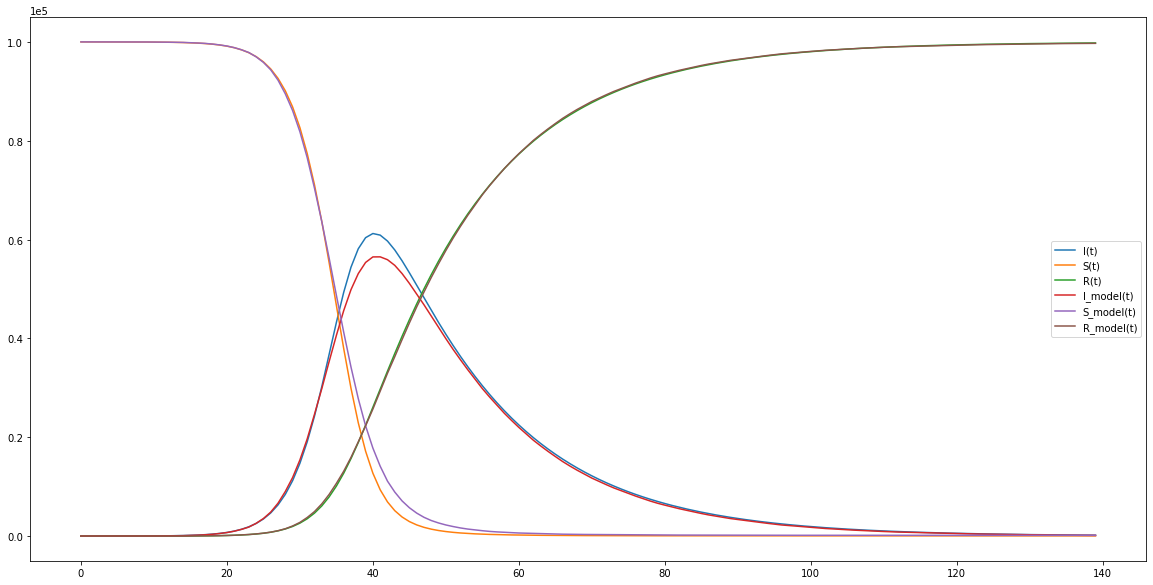

In [13]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.43
gamma = 0.06
iterations = 140

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Perfect mix

## Path simulation 1
Chemin au dossier de la simulation

In [14]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/perfect_mix/1"

## Temps d'exécutions (ms)

In [15]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init   Run  Mesures  Close  Total
0    81  1692        0      0   1774


## Modèle SIR

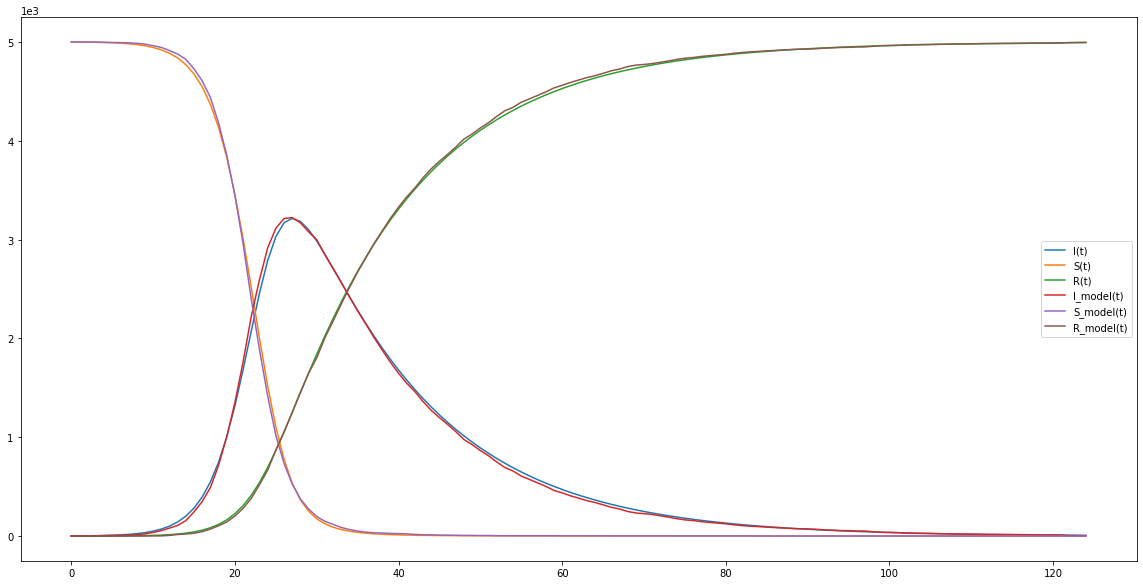

In [16]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 5000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.49
gamma = 0.062
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [17]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/perfect_mix/2"

## Temps d'exécutions (ms)

In [18]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init   Run  Mesures  Close  Total
0   114  9230        7     31   9384


## Modèle SIR

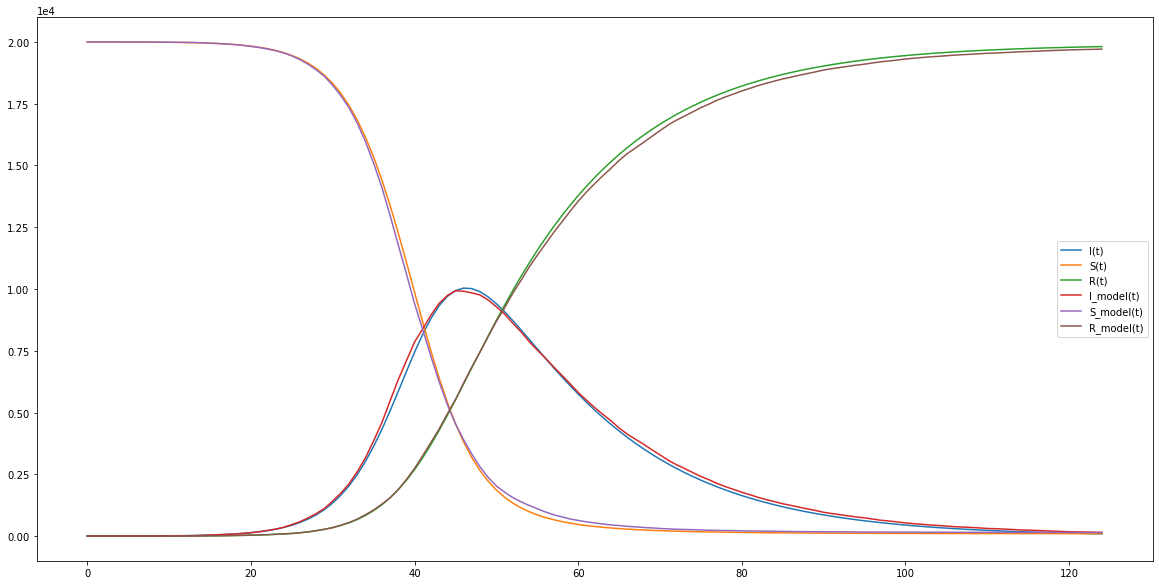

In [19]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 20000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.33
gamma = 0.065
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [20]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/perfect_mix/3"

## Temps d'exécutions (ms)

In [21]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   136  23123       24     19  23304


## Modèle SIR

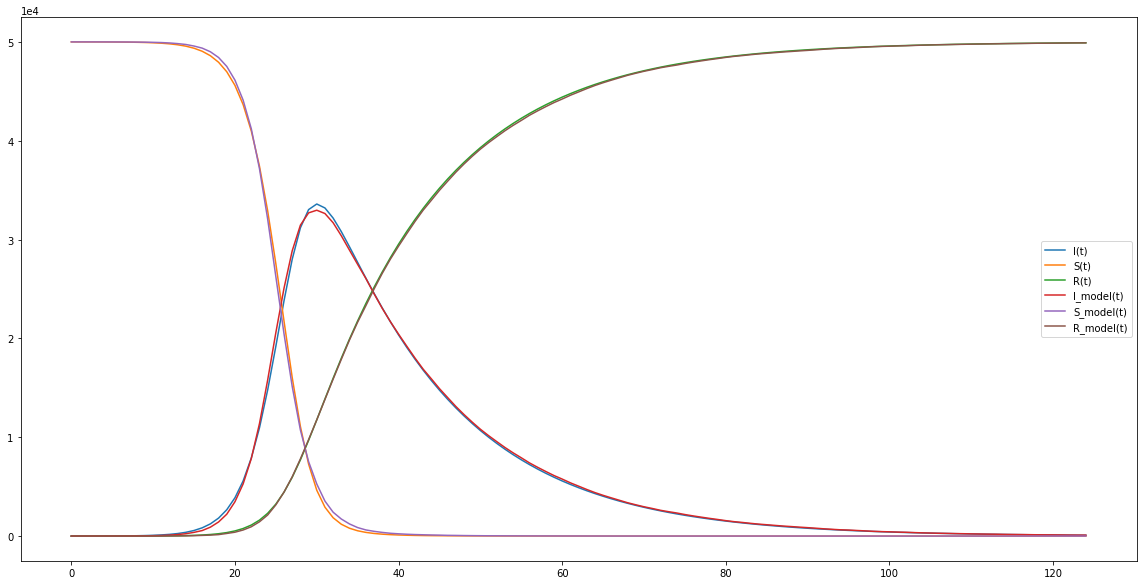

In [22]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 50000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.55
gamma = 0.063
iterations = 125

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [23]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Reference/perfect_mix/4"

## Temps d'exécutions (ms)

In [24]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   297  50166       10     51  50526


## Modèle SIR

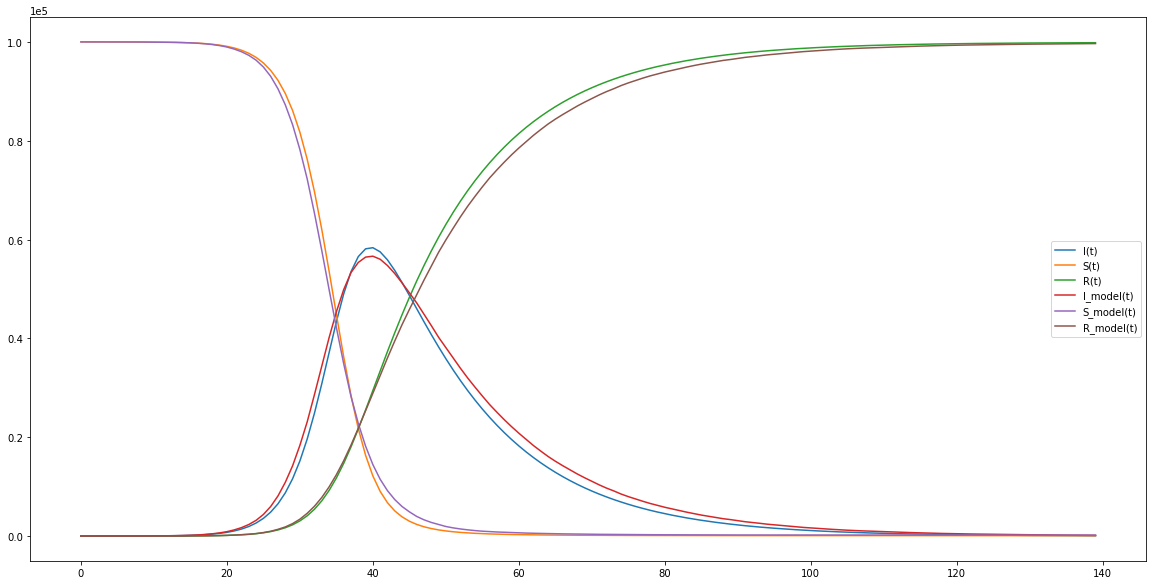

In [25]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.44
gamma = 0.068
iterations = 140

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_line, = plt.plot(I_comp, label='I(t)')
S_line, = plt.plot(S_comp, label='S(t)')
R_line, = plt.plot(R_comp, label='R(t)')
I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_line, S_line, R_line, I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Diversité

## Perfect Mix

## Low Compatibility

## Path simulation 1
Chemin au dossier de la simulation

In [26]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/lowCompatibility/1"

## Temps d'exécutions (ms)

In [27]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   593  46050       47     38  46729


## Modèle SIR

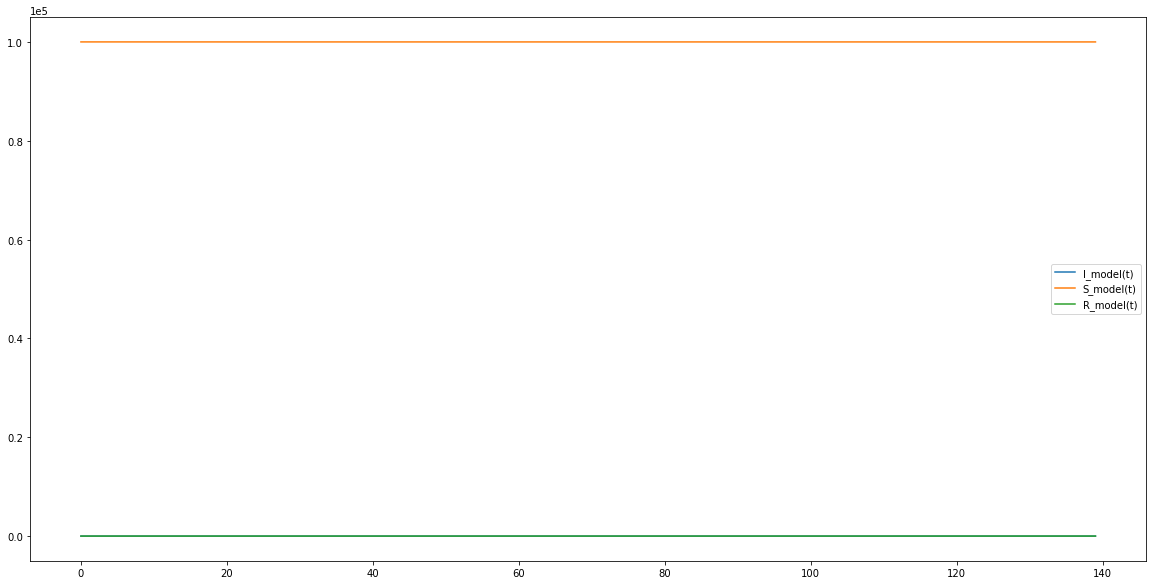

In [28]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [29]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/lowCompatibility/2"

## Temps d'exécutions (ms)

In [30]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   776  45956       42     65  46841


## Modèle SIR

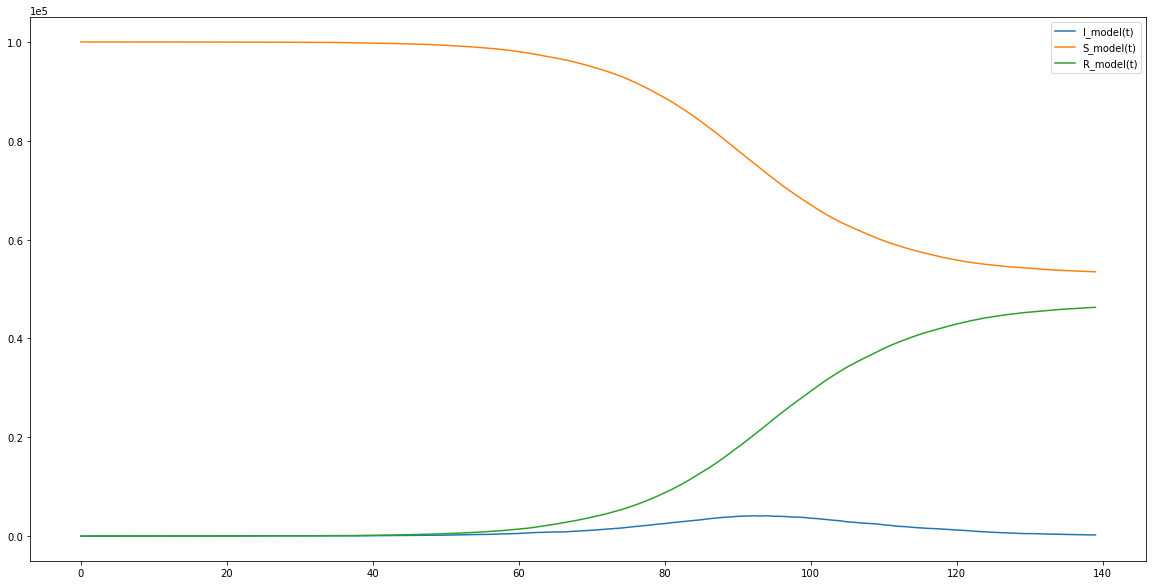

In [31]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [32]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/lowCompatibility/3"

## Temps d'exécutions (ms)

In [33]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   599  47837       12     32  48480


## Modèle SIR

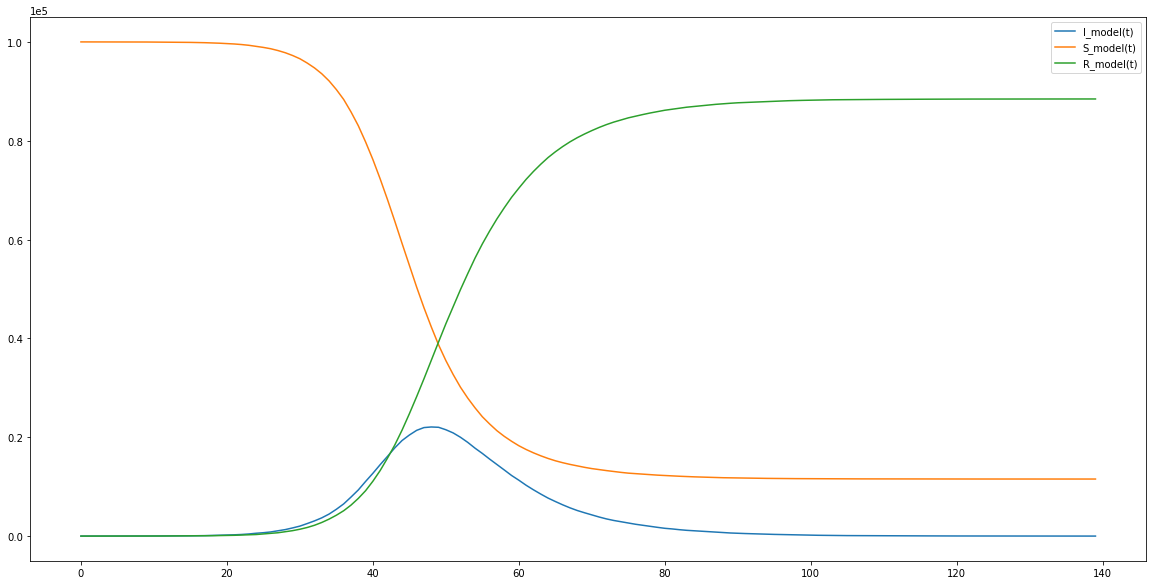

In [34]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [35]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/lowCompatibility/4"

## Temps d'exécutions (ms)

In [36]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   992  45746       34     42  46816


## Modèle SIR

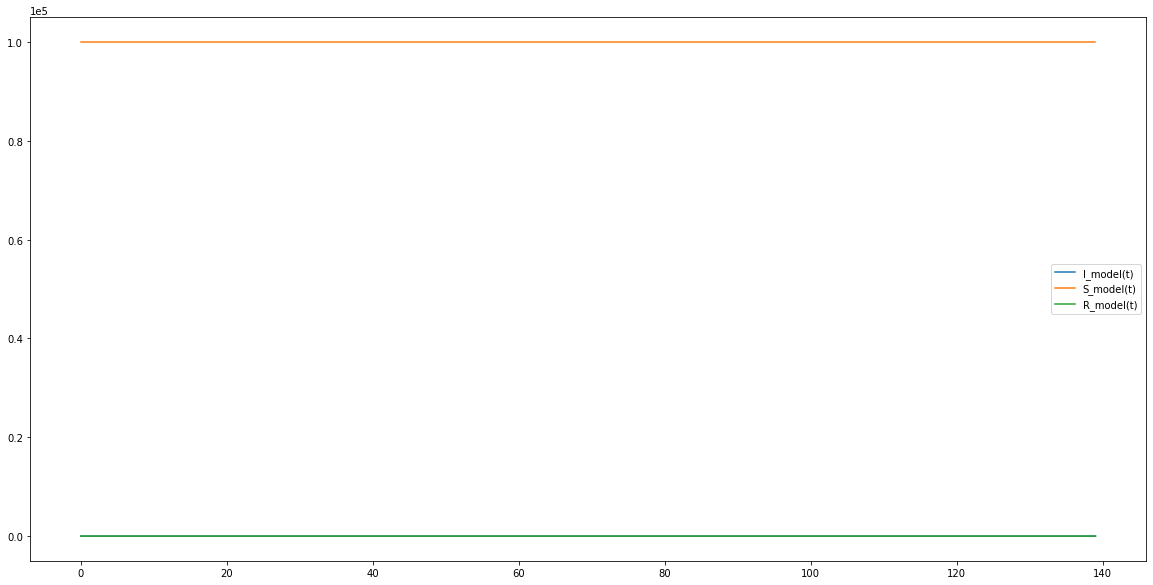

In [37]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Diversité

## Perfect Mix

## Medium Compatibility

## Path simulation 1
Chemin au dossier de la simulation

In [38]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/mediumCompatibility/1"

## Temps d'exécutions (ms)

In [39]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   585  49752       17     45  50401


## Modèle SIR

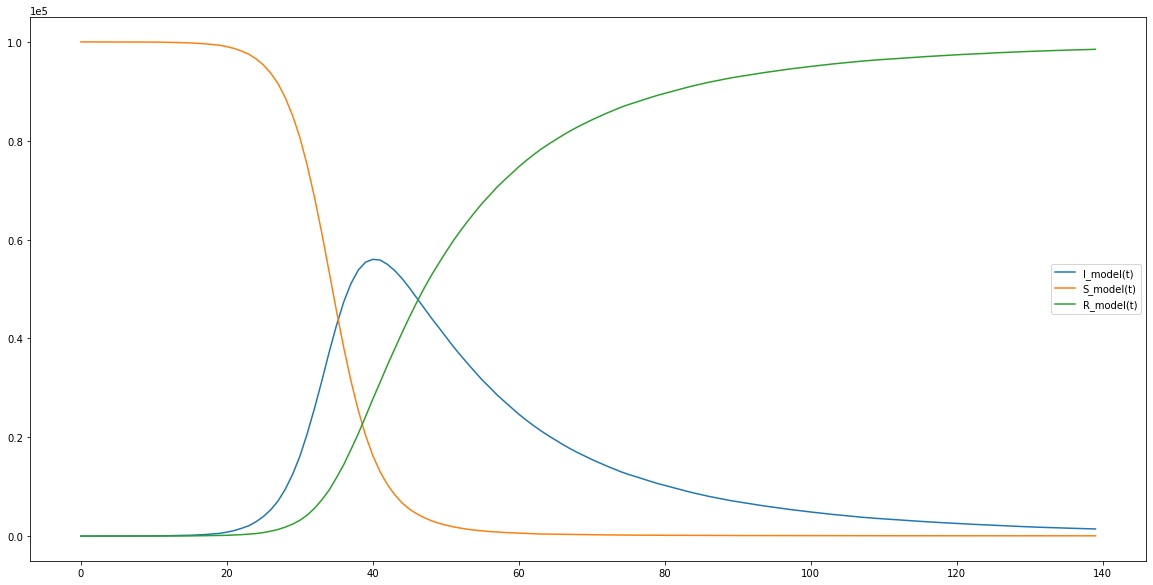

In [40]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [41]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/mediumCompatibility/2"

## Temps d'exécutions (ms)

In [42]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   631  48886       35     49  49627


## Modèle SIR

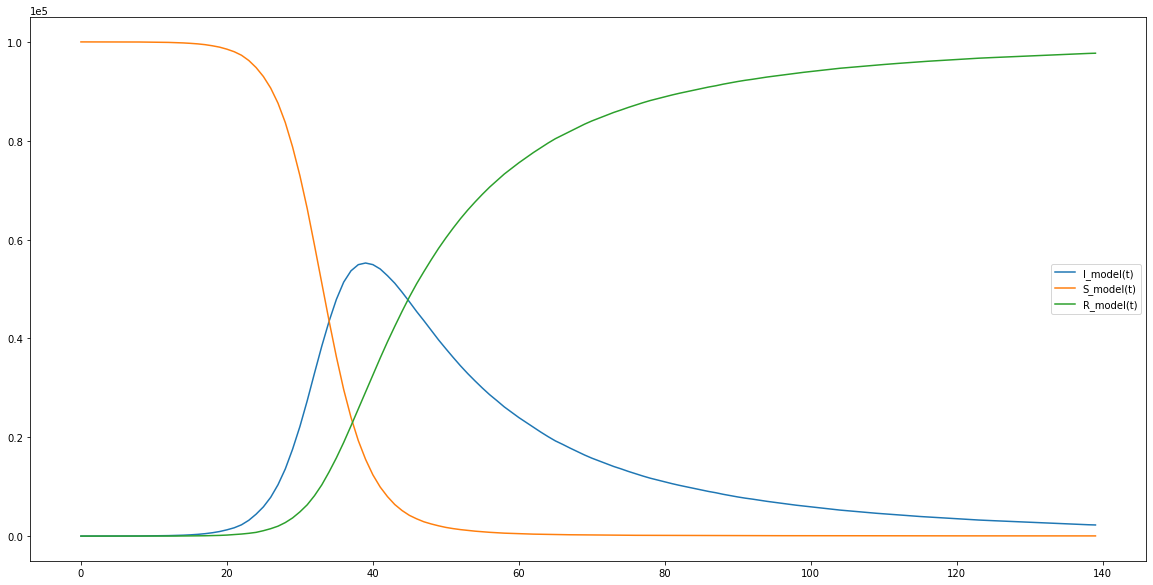

In [43]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [44]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/mediumCompatibility/3"

## Temps d'exécutions (ms)

In [45]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   828  49391        8     22  50252


## Modèle SIR

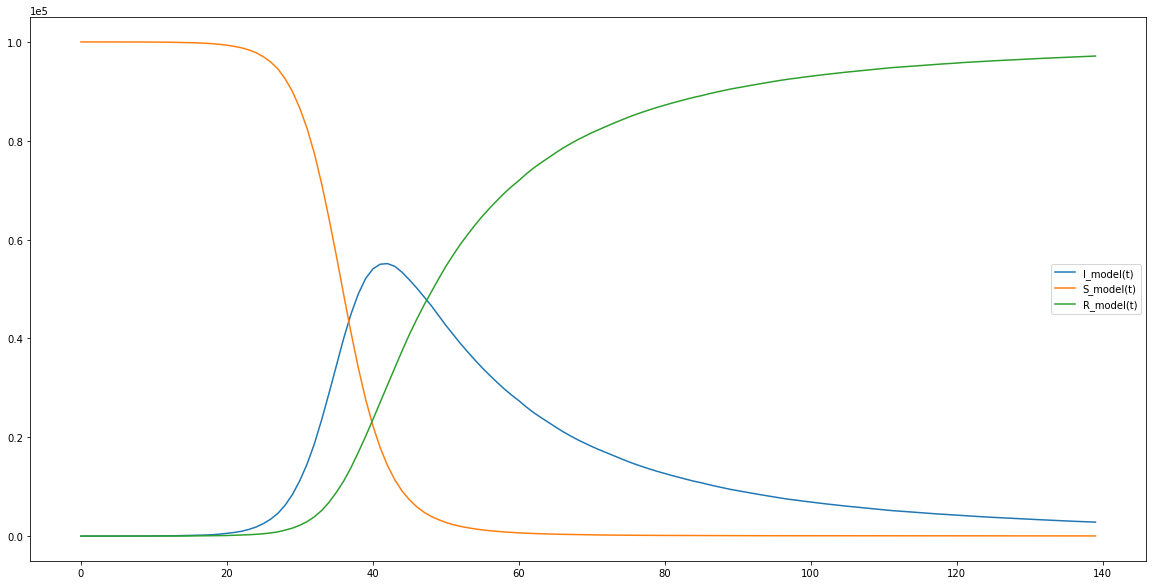

In [46]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [47]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/mediumCompatibility/4"

## Temps d'exécutions (ms)

In [48]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   729  45648       20     30  46428


## Modèle SIR

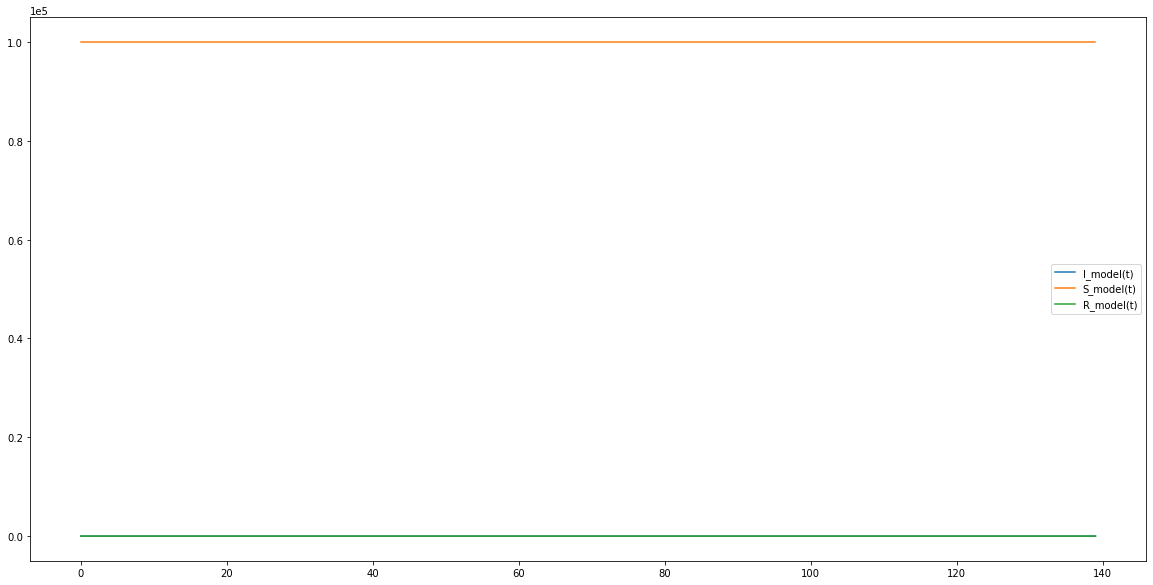

In [49]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Diversité

## Perfect Mix

## High Compatibility

## Path simulation 1
Chemin au dossier de la simulation

In [50]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/highCompatibility/1"

## Temps d'exécutions (ms)

In [51]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   522  52069        5      4  52601


## Modèle SIR

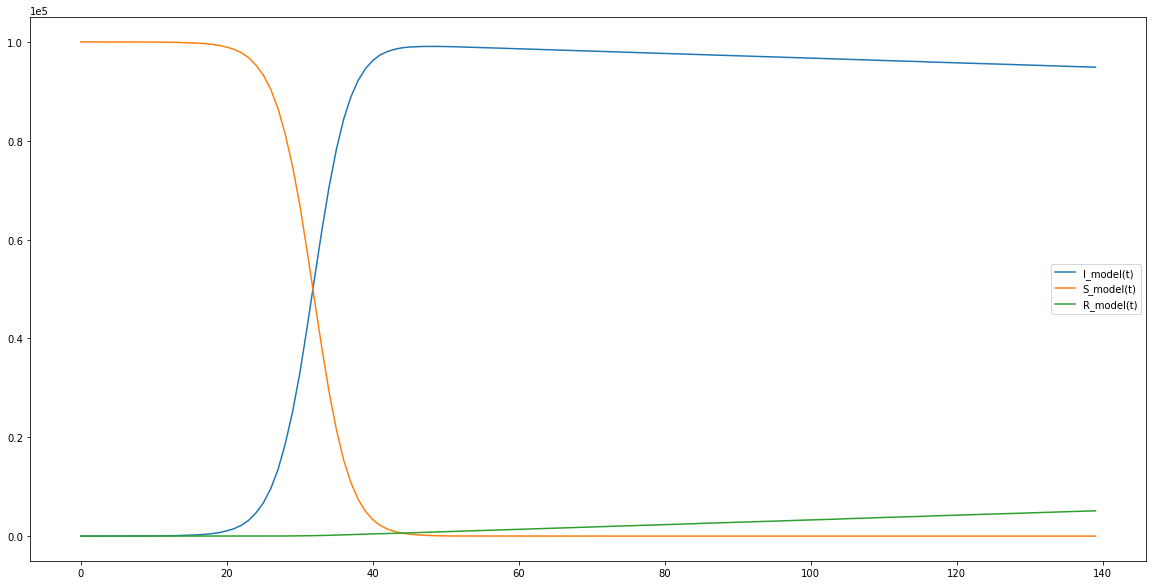

In [52]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [53]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/highCompatibility/2"

## Temps d'exécutions (ms)

In [54]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   284  51987        5     10  52288


## Modèle SIR

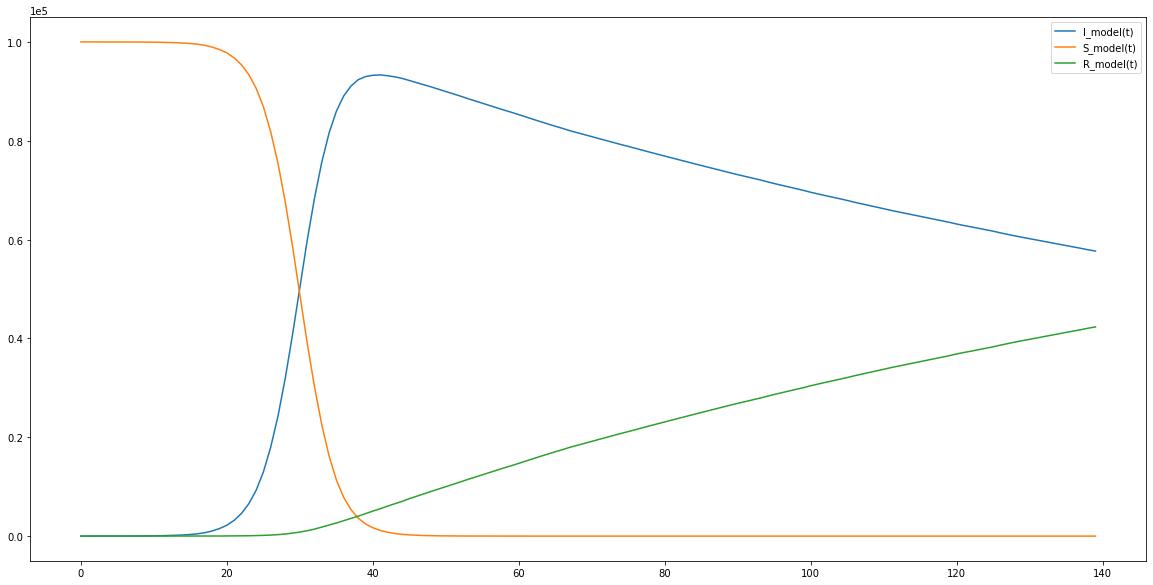

In [55]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [56]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/highCompatibility/3"

## Temps d'exécutions (ms)

In [57]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   249  50911       39     18  51218


## Modèle SIR

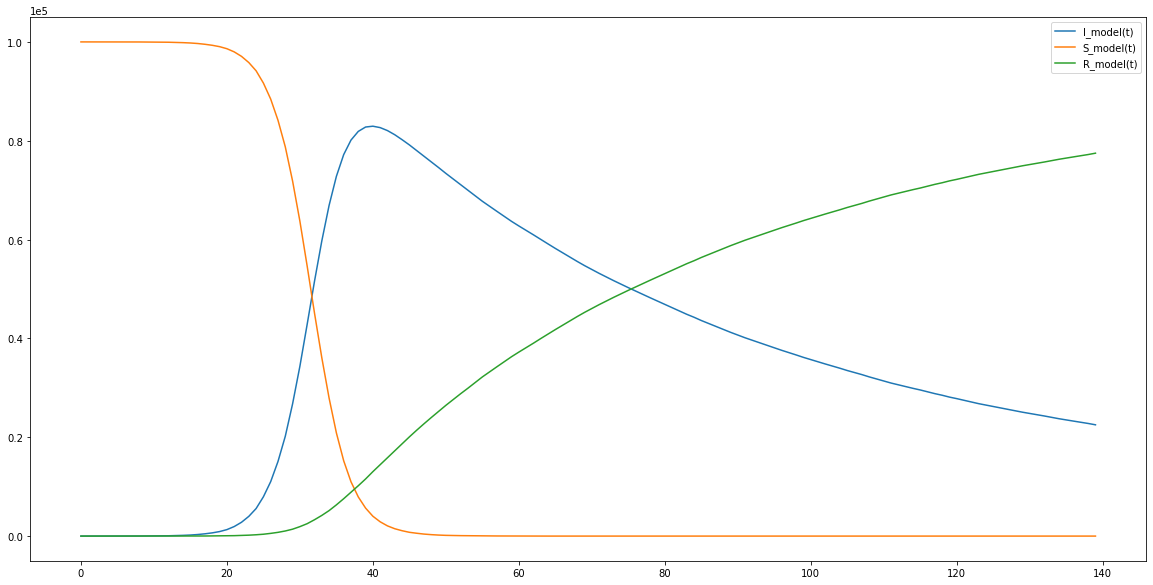

In [58]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [59]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Diversite/perfect_mix/highCompatibility/4"

## Temps d'exécutions (ms)

In [60]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   862  45489       35     30  46417


## Modèle SIR

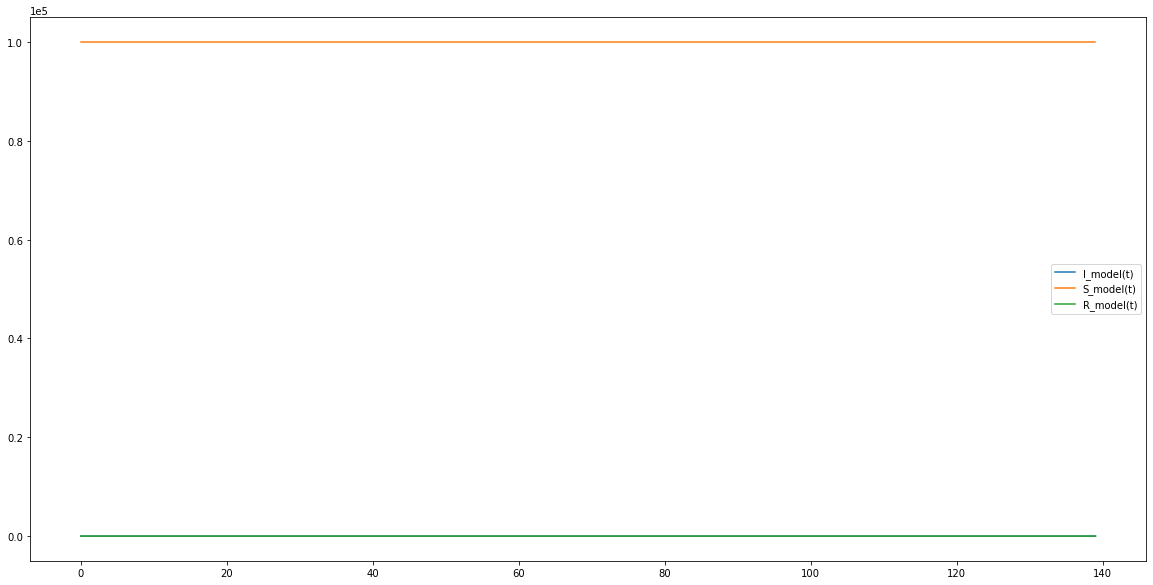

In [61]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Mutation

## Perfect Mix

## Low Compatibility

## Path simulation 1
Chemin au dossier de la simulation

In [62]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/lowCompatibility/1"

## Temps d'exécutions (ms)

In [63]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   516  45252       34     29  45833


## Modèle SIR

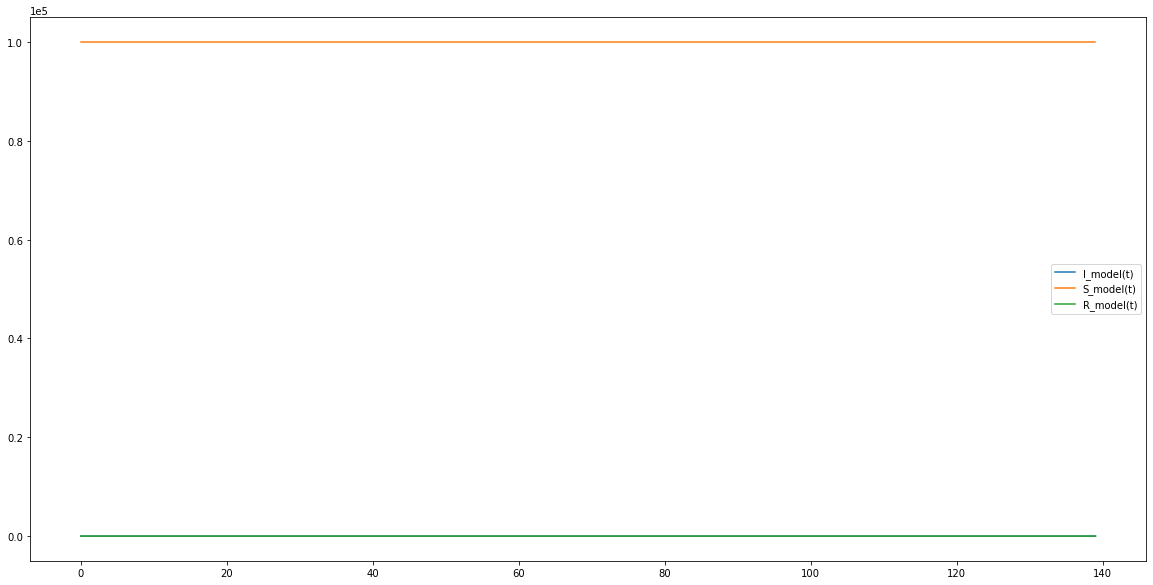

In [64]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [65]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/lowCompatibility/2"

## Temps d'exécutions (ms)

In [66]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   396  46433       52     20  46902


## Modèle SIR

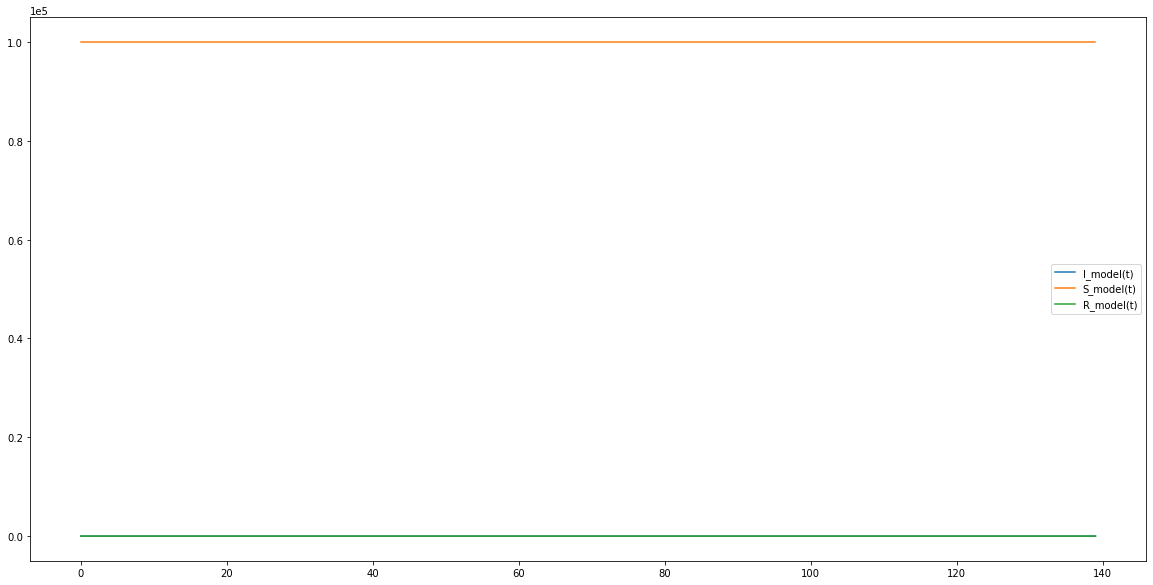

In [67]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [68]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/lowCompatibility/3"

## Temps d'exécutions (ms)

In [69]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   510  45552       23     26  46113


## Modèle SIR

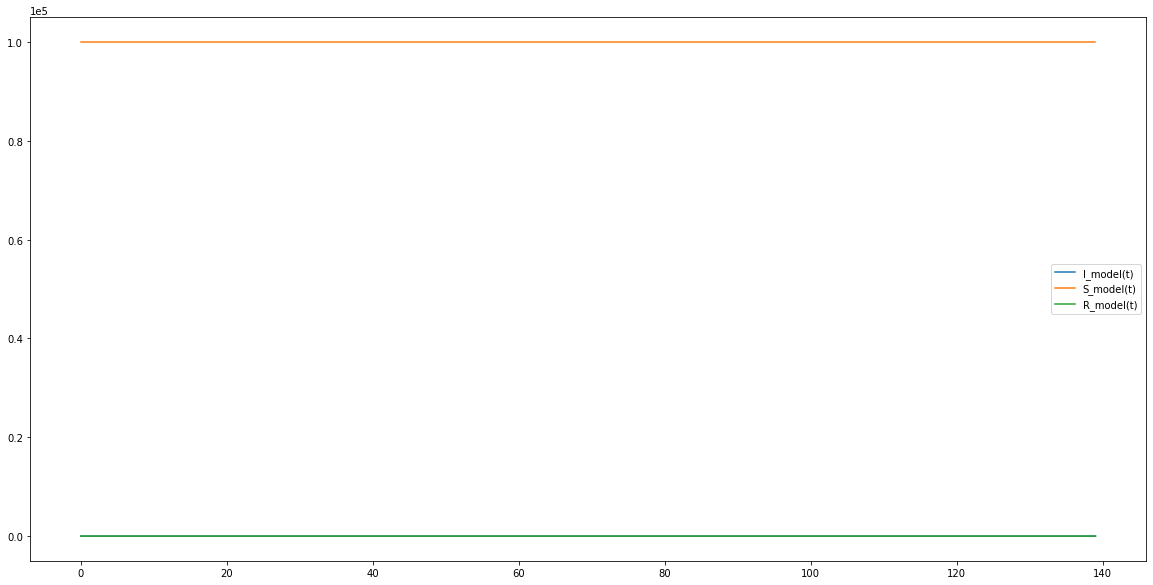

In [70]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [71]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/lowCompatibility/4"

## Temps d'exécutions (ms)

In [72]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   513  44978       74     11  45578


## Modèle SIR

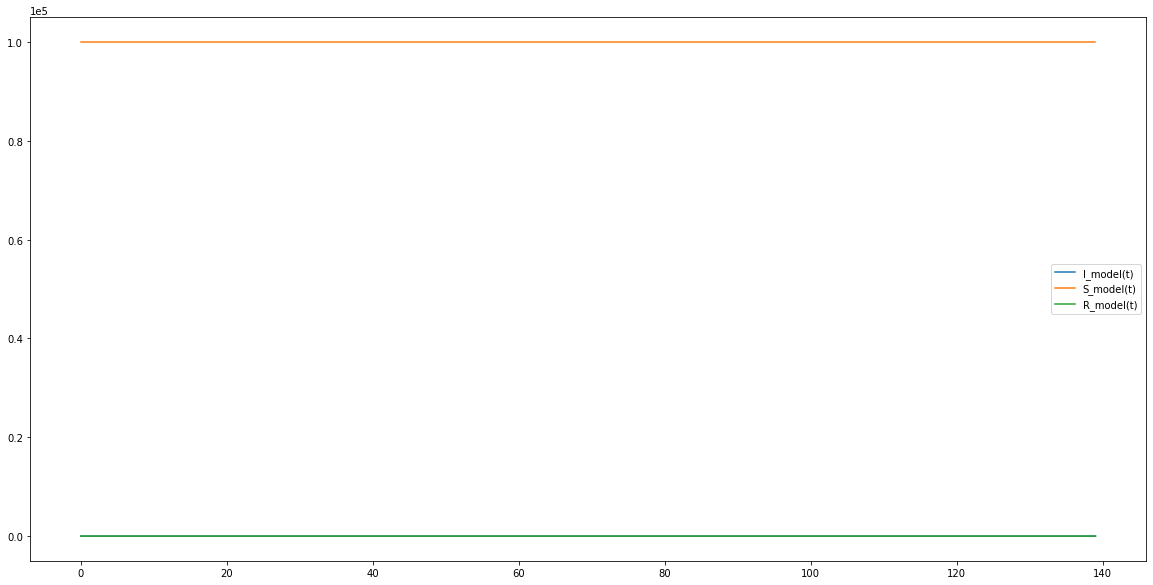

In [73]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Mutation

## Perfect Mix

## Medium Compatibility

## Path simulation 1
Chemin au dossier de la simulation

In [74]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/mediumCompatibility/1"

## Temps d'exécutions (ms)

In [75]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   475  50480        8     49  51013


## Modèle SIR

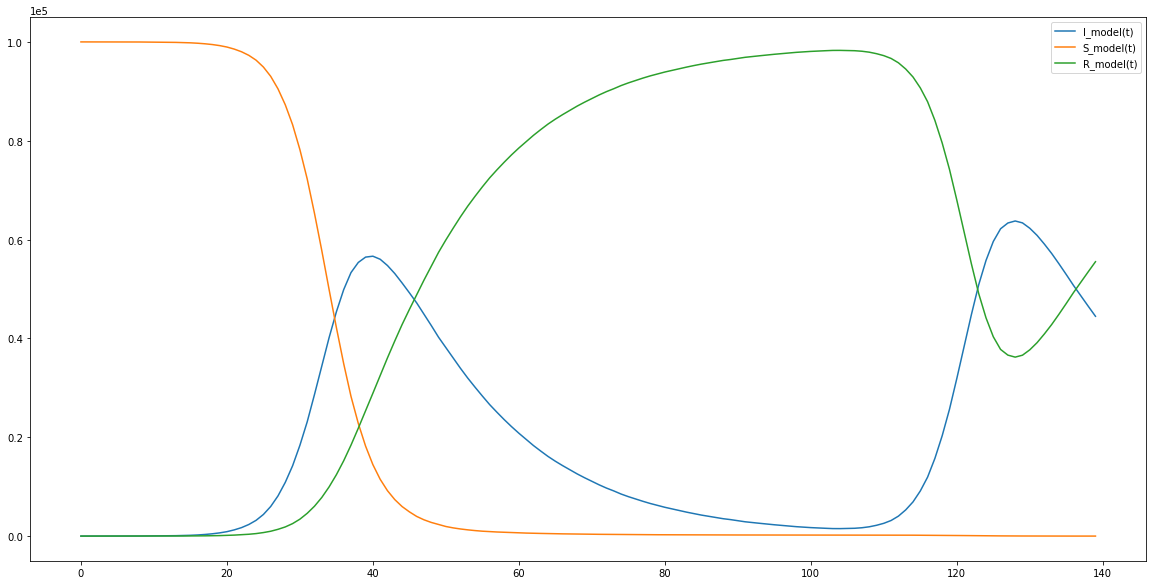

In [76]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [77]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/mediumCompatibility/2"

## Temps d'exécutions (ms)

In [78]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   586  51669        5     13  52274


## Modèle SIR

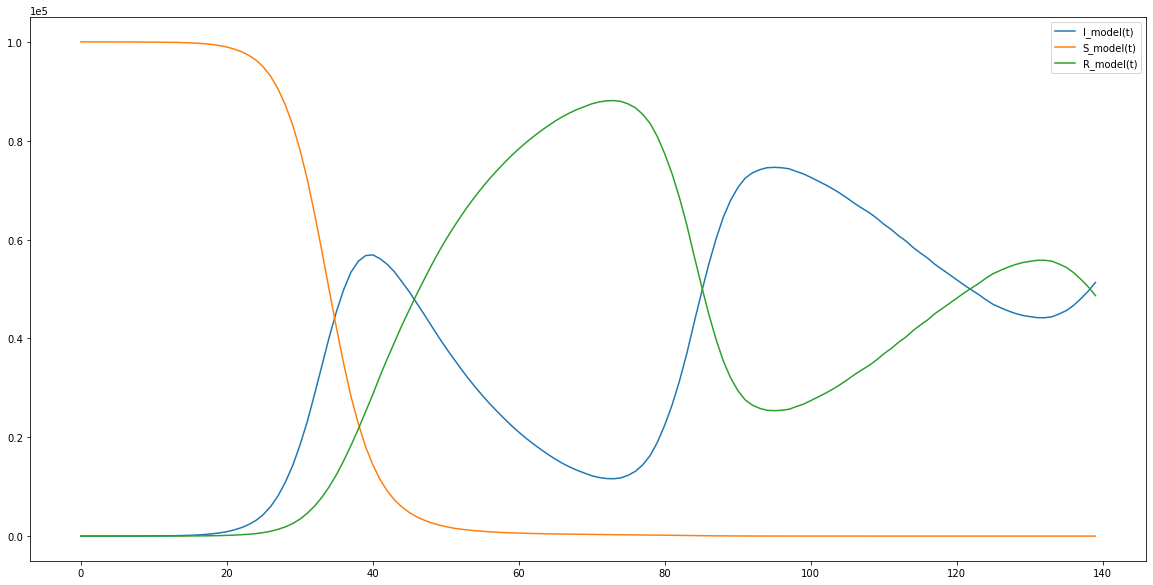

In [79]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [80]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/mediumCompatibility/3"

## Temps d'exécutions (ms)

In [81]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   571  52032        4     15  52623


## Modèle SIR

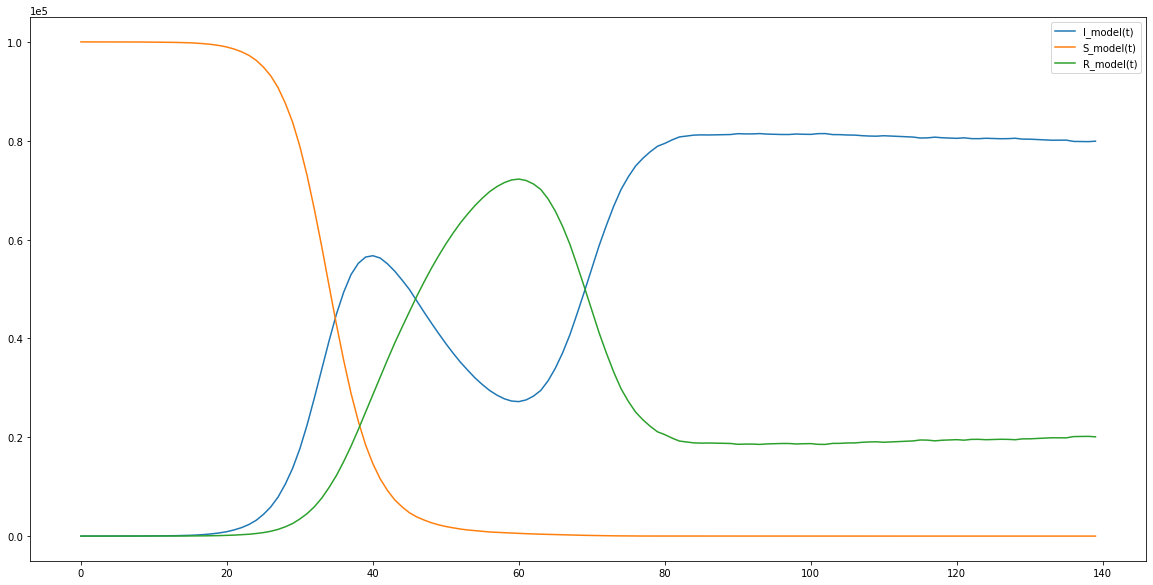

In [82]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [83]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/mediumCompatibility/4"

## Temps d'exécutions (ms)

In [84]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   467  52406        5     12  52892


## Modèle SIR

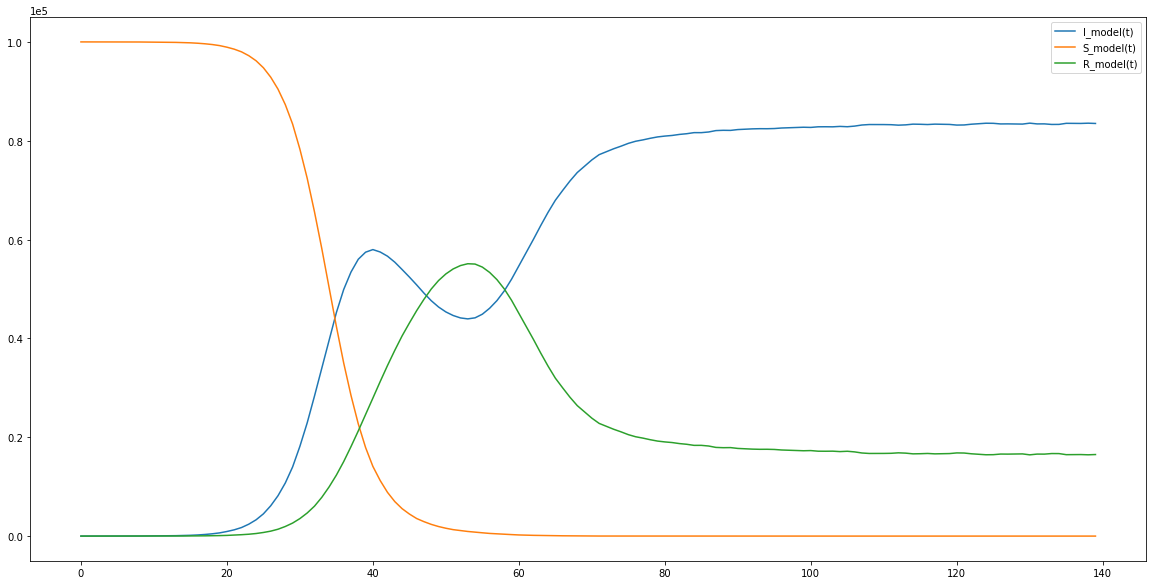

In [85]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

# Mutation

## Perfect Mix

## High Compatibility

## Path simulation 1
Chemin au dossier de la simulation

In [86]:
path1 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/highCompatibility/1"

## Temps d'exécutions (ms)

In [87]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   258  50998        8      5  51272


## Modèle SIR

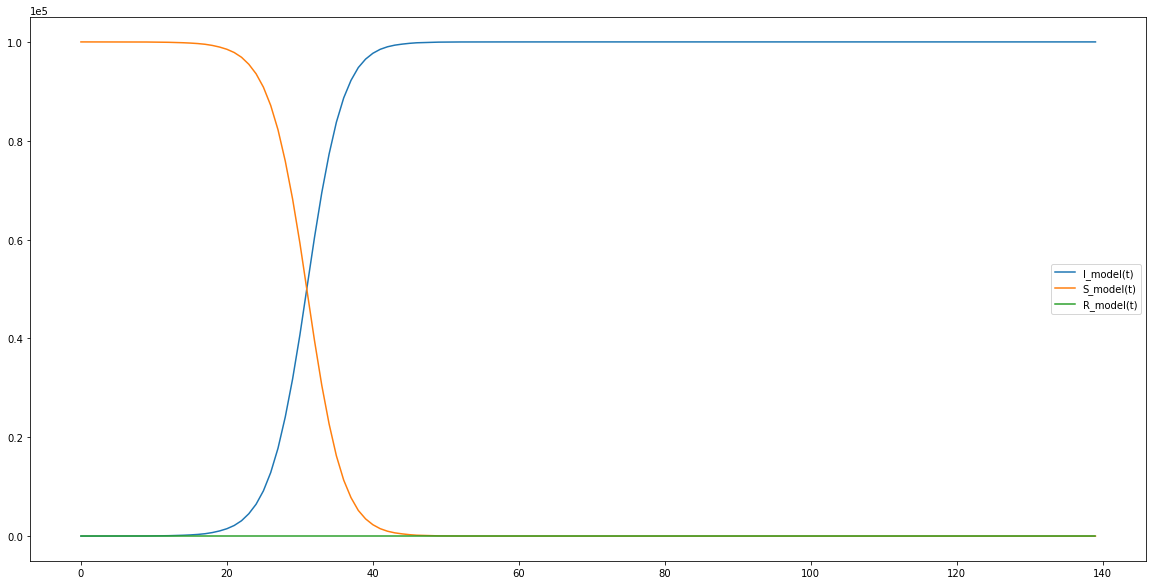

In [88]:
contamine = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 2
Chemin au dossier de la simulation

In [89]:
path2 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/highCompatibility/2"

## Temps d'exécutions (ms)

In [90]:
temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   503  51629       11      6  52149


## Modèle SIR

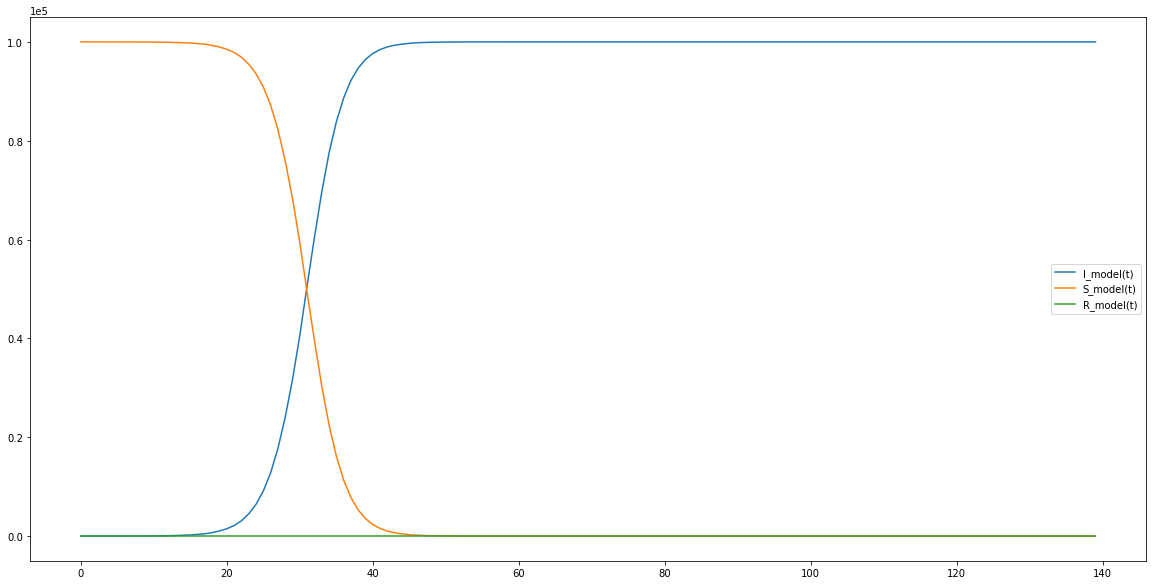

In [91]:
contamine = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 3
Chemin au dossier de la simulation

In [92]:
path3 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/highCompatibility/3"

## Temps d'exécutions (ms)

In [93]:
temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   484  51507       11      6  52010


## Modèle SIR

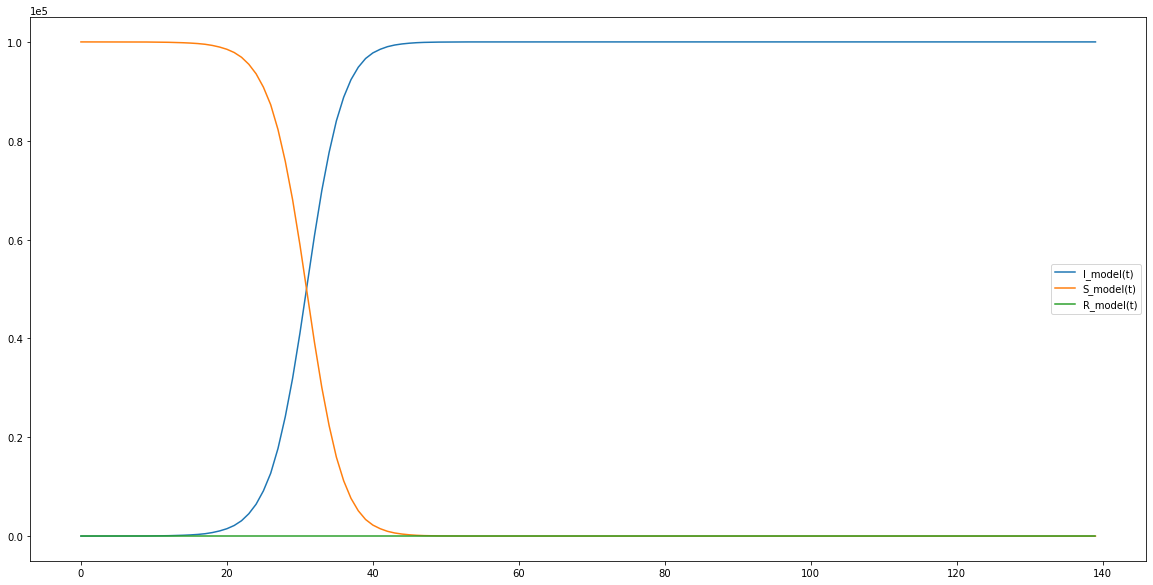

In [94]:
contamine = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())

## Path simulation 4
Chemin au dossier de la simulation

In [95]:
path4 = "/home/maxime/Documents/Automate_Cellulaire/Diversity/Simulations/SIR/Mutation/perfect_mix/highCompatibility/4"

## Temps d'exécutions (ms)

In [96]:
temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init    Run  Mesures  Close  Total
0   330  51535       29      8  51904


## Modèle SIR

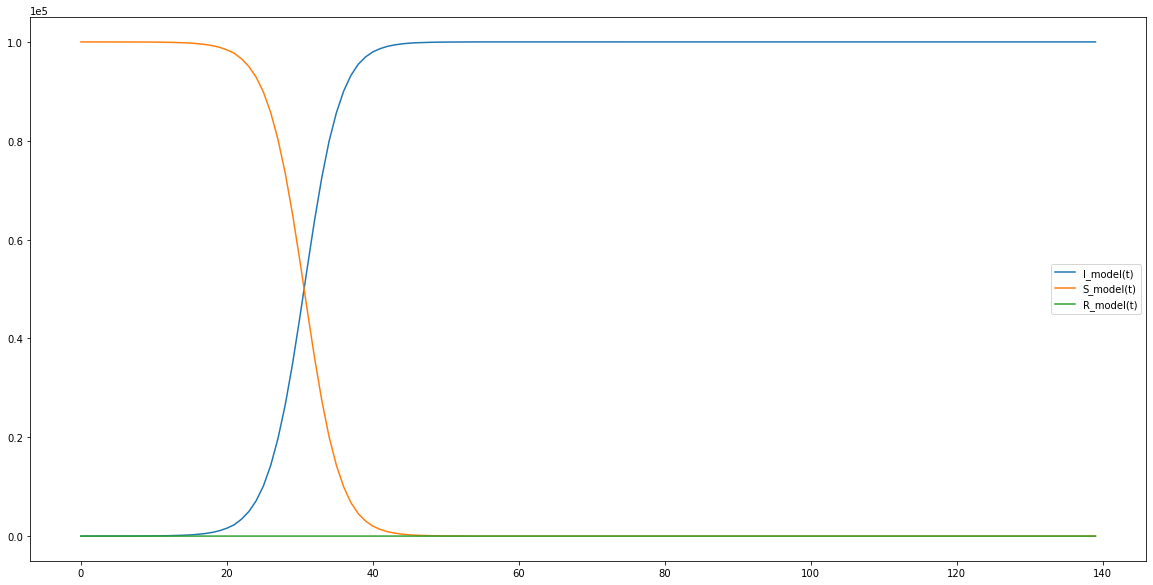

In [97]:
contamine = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

nombre_individus_S = N
nombre_individus_data_S = nombre_individus_S - contamine
nombre_individus_data_S = nombre_individus_data_S['Nombre de contaminés'].subtract(recovered['Recovered'])

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(20, 10))

I_model, = plt.plot(contamine, label='I_model(t)')
S_model, = plt.plot(nombre_individus_data_S, label='S_model(t)')
R_model, = plt.plot(recovered, label='R_model(t)')


plt.legend(handles=[I_model, S_model, R_model])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation

plt.show()

# MSE I
#print("MSE I : ", np.square(np.subtract(contamine['Nombre de contaminés'].values.tolist(),I_comp)).mean())

# MSE S
#print("MSE S : ", np.square(np.subtract(nombre_individus_data_S.values.tolist(),S_comp)).mean())

# MSE R
#print("MSE R : ", np.square(np.subtract(recovered['Recovered'].values.tolist(),R_comp)).mean())